In [75]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, mean_squared_error
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [76]:
df = pd.read_csv('apple-vision-pro-reviews.csv')

In [77]:
df

,text,Sentiment,Sentiment_Label,Sentiment_Code
0,upbeat music,0.000000,Neutral,0
1,"- all right, so you've seen the unboxing.",0.285714,Positive,1
2,now it's time for the breakdown.,0.000000,Neutral,0
3,what is using the apple\nvision pro actually l...,0.000000,Neutral,0
4,"this is easily one of apple's\ncraziest, most ...",0.466667,Positive,1
...,...,...,...,...
18116,you want to see i will do my best to try,1.000000,Positive,1
18117,and get that in the next video but this,0.000000,Neutral,0
18118,is been with mac rumors thanks so much,0.200000,Positive,1
18119,for watching and i hope to see you guys,0.000000,Neutral,0


In [78]:
label_counts = df['Sentiment_Label'].value_counts() #menghitung jumlah data pada kolom Sentiment_Label

In [79]:
label_percentage = label_counts
label_percentage
#menghitung persentase data pada kolom Sentiment_Label

Sentiment_Label
Neutral     10752
Positive     5493
Negative     1876
Name: count, dtype: int64

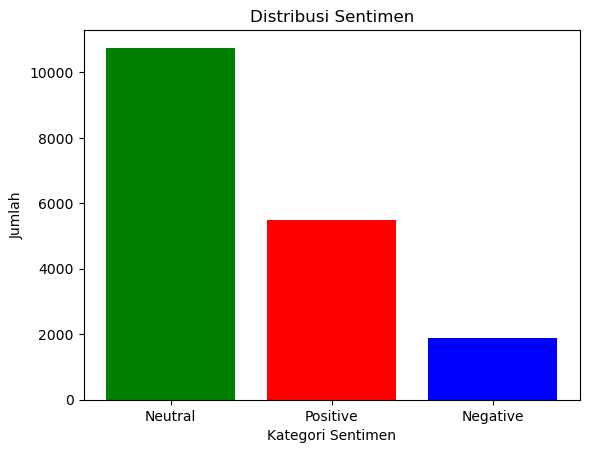

In [80]:
labels = ['Neutral','Positive','Negative']
plt.bar(labels, label_counts, color=['green', 'red', 'blue'])

# Menambahkan judul dan label sumbu
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')

# Menampilkan barchart
plt.show()

In [81]:
positive_df = df[df['Sentiment_Label'] == 'Positive'] #mengambil data yang memiliki nilai 'Positive' pada kolom Sentiment_Label
negative_df = df[df['Sentiment_Label'] == 'Negative'] #mengambil data yang memiliki nilai 'Negative' pada kolom Sentiment_Label
neutral_df = df[df['Sentiment_Label'] == 'Neutral'] #mengambil data yang memiliki nilai 'Neutral' pada kolom Sentiment_Label

In [82]:
# mencari jumlah sampel maksimum dari label yang paling banyak
max_samples = max(len(positive_df), len(negative_df), len(neutral_df))

In [83]:
# Lakukan oversampling pada masing-masing DataFrame
positive_upsampled = resample(positive_df,
                              replace=True,    # Mengambil sampel dengan pengembalian
                              n_samples=max_samples,  # Sesuaikan dengan jumlah sampel maksimum
                              random_state=42) # Seed untuk random number generator

negative_upsampled = resample(negative_df,
                              replace=True,
                              n_samples=max_samples,
                              random_state=42)

neutral_upsampled = resample(neutral_df,
                             replace=True,
                             n_samples=max_samples,
                             random_state=42)

In [84]:
# Gabungkan kembali DataFrame yang telah di-oversample
df_balanced = pd.concat([positive_upsampled, negative_upsampled, neutral_upsampled])

# Acak urutan DataFrame
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [85]:
# Tampilkan hasil
print(df_balanced['Sentiment_Label'].value_counts(normalize=True) * 100)

Sentiment_Label
Neutral     33.333333
Negative    33.333333
Positive    33.333333
Name: proportion, dtype: float64


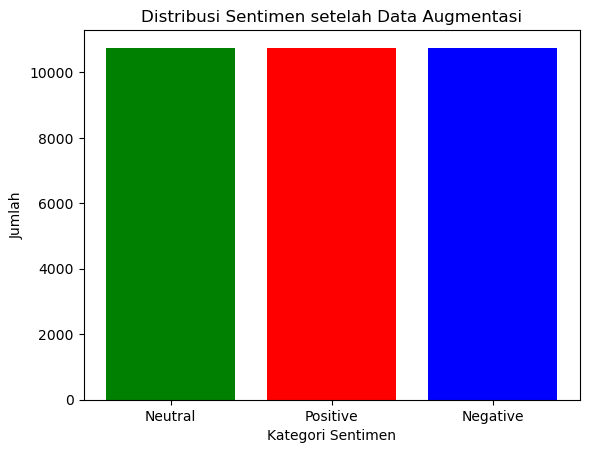

In [86]:
label = df_balanced['Sentiment_Label'].value_counts() #menghitung jumlah data pada kolom Sentiment_Label
labels = ['Neutral','Positive','Negative'] #label untuk sumbu x
plt.bar(labels, label, color=['green', 'red', 'blue']) #membuat barchart dengan warna berbeda

# Menambahkan judul dan label sumbu
plt.title('Distribusi Sentimen setelah Data Augmentasi')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')

# Menampilkan barchart
plt.show()

In [87]:
# Prepare data
X = df_balanced['text'].values #mengambil data pada kolom text
y = df_balanced['Sentiment_Code'].values #mengambil data pada kolom Sentiment_Code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #membagi data menjadi data training dan data testing

In [88]:
# Tokenize text
tokenizer = Tokenizer(num_words=5000) #membuat objek tokenizer dengan jumlah kata maksimal 5000 ->  tokenizer akan mempertimbangkan hanya 5000 kata yang paling sering muncul dalam data pelatihan.
tokenizer.fit_on_texts(X_train) #menghitung frekuensi kata pada data training -> Tokenizer akan membuat indeks untuk setiap kata yang muncul dalam teks hingga batas 5000 kata yang paling umum.

X_train_seq = tokenizer.texts_to_sequences(X_train) #mengubah data training menjadi sequence
X_test_seq = tokenizer.texts_to_sequences(X_test) #mengubah data testing menjadi sequence

#tujuan di lakukan tokenisasi adalah untuk membatasi agar hanya ada 5000 kata yang paling sering muncul dalam data pelatihan
#texts to sequences adalah proses mengubah teks menjadi angka , karena model machine learning hanya dapat memahami angka

In [89]:
# Pad sequences
max_length = 100  # Adjust as needed
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length) #mengubah data training menjadi sequence dengan panjang maksimal 100
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length) #mengubah data testing menjadi sequence dengan panjang maksimal 100

#Jika kalimat lain lebih panjang atau lebih pendek, padding ditambahkan untuk memastikan semua urutan memiliki panjang yang sama.

In [90]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3) #mengubah data training menjadi one-hot encoding
y_test = to_categorical(y_test, num_classes=3) #mengubah data testing menjadi one-hot encoding

#mengubah data target menjadi one-hot encoding, yaitu mengubah data target menjadi bentuk biner
# Kesesuaian dengan Model Klasifikasi:

# One-hot encoding membuatnya lebih mudah bagi model untuk memproses dan mengklasifikasikan data ke dalam kategori yang benar. Ini memberikan output yang jelas dan langsung sesuai dengan kelas yang dimaksud.
# Menghindari Bias Urutan:

# Dengan one-hot encoding, setiap kelas diperlakukan secara independen dan tidak ada urutan atau hubungan ordinal yang salah antara kelas-kelas yang berbeda.

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay
#Function evaluate model
def evaluate_model(model, X_test_padded, y_test):
    # Evaluate model
    print('MODEL EVALUASI SEBELUM CROSS VALIDATION')
    loss, accuracy = model.evaluate(X_test_padded, y_test)
    
    # Predict and calculate additional metrics
    y_pred = np.argmax(model.predict(X_test_padded), axis=1)
    y_test_argmax = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
    precision = precision_score(y_test_argmax, y_pred, average='weighted')
    recall = recall_score(y_test_argmax, y_pred, average='weighted')
    f1 = f1_score(y_test_argmax, y_pred, average='weighted')
    cm = confusion_matrix(y_test_argmax, y_pred)
    
    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-Score: {f1}')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot metrics
    metrics = {'Loss': loss, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.figure(figsize=(10, 6))
    plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Evaluation Metrics')
    plt.ylim(0, 1.1)  # Assuming the metrics are between 0 and 1
    for i, value in enumerate(metric_values):
        plt.text(i, value + 0.02, f'{value:.2f}', ha='center')
    plt.show()

In [92]:
# Function to evaluate model with cross-validation
def evaluate_model_cv(model, X, y, n_splits=5):
    print('MODEL EVALUASI SETELAH CROSS VALIDATION')
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42) #membagi data menjadi 5 bagian
    metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'mae': [], 'mse': []} #membuat dictionary untuk menyimpan hasil evaluasi
    total_cm = None

    for train_index, test_index in kfold.split(X):
        X_train_fold, X_test_fold = X[train_index], X[test_index] #membagi data menjadi data training dan data testing
        y_train_fold, y_test_fold = y[train_index], y[test_index] #membagi label menjadi label training dan label testing

        # Train the model
        model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0) #melatih model

        # Evaluate model
        loss, accuracy = model.evaluate(X_test_fold, y_test_fold, verbose=0) #menghitung loss dan akurasi
        
        # Predict and calculate additional metrics
        y_pred = np.argmax(model.predict(X_test_fold), axis=1)
        y_test_argmax = np.argmax(y_test_fold, axis=1)
        precision = precision_score(y_test_argmax, y_pred, average='weighted')
        recall = recall_score(y_test_argmax, y_pred, average='weighted')
        f1 = f1_score(y_test_argmax, y_pred, average='weighted')
        cm = confusion_matrix(y_test_argmax, y_pred)

        # Append metrics
        metrics['loss'].append(loss)
        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
        if total_cm is None:
            total_cm = cm
        else:
            total_cm += cm
    
    # Print average metrics
    print(f'Average Loss: {np.mean(metrics["loss"])}')
    print(f'Average Accuracy: {np.mean(metrics["accuracy"])}')
    print(f'Average Precision: {np.mean(metrics["precision"])}')
    print(f'Average Recall: {np.mean(metrics["recall"])}')
    print(f'Average F1-Score: {np.mean(metrics["f1"])}')
    print('Confusion Matrices:')
    # Accumulate confusion matrix
    
    disp = ConfusionMatrixDisplay(confusion_matrix=total_cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Total Confusion Matrix')
    plt.show()

    # Plot metrics
    metrics = {'Loss': np.mean(metrics['loss']), 'Accuracy': np.mean(metrics['accuracy']), 'Precision': np.mean(metrics['precision']), 'Recall': np.mean(metrics['recall']), 'F1-Score': np.mean(metrics['f1'])}
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())

    plt.figure(figsize=(10, 6))
    plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('Evaluation Metrics')
    plt.ylim(0, 1.1)  # Assuming the metrics are between 0 and 1
    for i, value in enumerate(metric_values):
        plt.text(i, value + 0.02, f'{value:.3f}', ha='center')
    plt.show()

    

Epoch 1/10
807/807 [==============================] - 81s 97ms/step - loss: 0.2339 - accuracy: 0.9018 - val_loss: 0.1060 - val_accuracy: 0.9654
Epoch 2/10
807/807 [==============================] - 76s 94ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0600 - val_accuracy: 0.9867
Epoch 3/10
807/807 [==============================] - 75s 93ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0444 - val_accuracy: 0.9921
Epoch 4/10
807/807 [==============================] - 77s 95ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0557 - val_accuracy: 0.9887
Epoch 5/10
807/807 [==============================] - 78s 96ms/step - loss: 0.0073 - accuracy: 0.9983 - val_loss: 0.0433 - val_accuracy: 0.9910
Epoch 6/10
807/807 [==============================] - 77s 96ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0434 - val_accuracy: 0.9930
Epoch 7/10
807/807 [==============================] - 82s 101ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0507 - val_accuracy

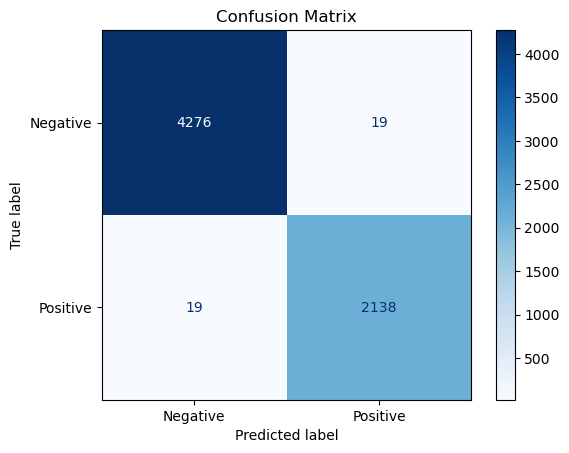

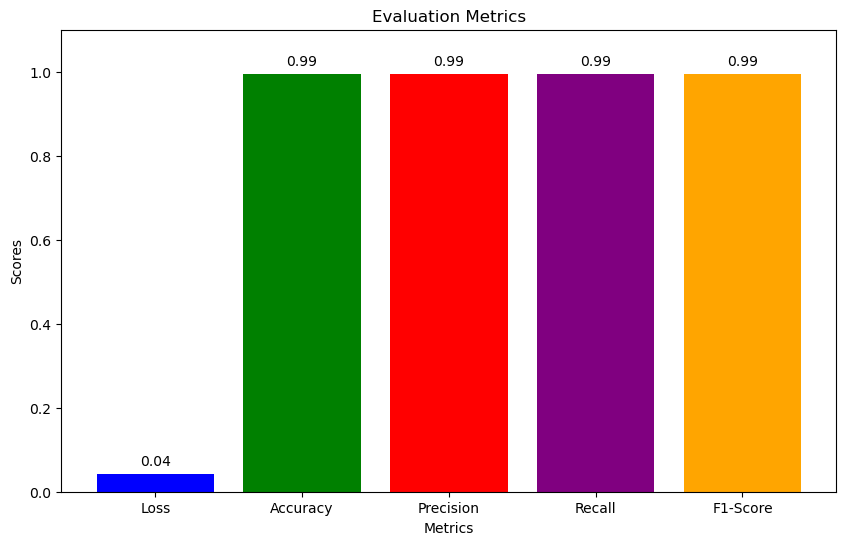

MODEL EVALUASI SETELAH CROSS VALIDATION
41/41 [==============================] - 2s 42ms/step
Average Loss: 0.004160028869273446
Average Accuracy: 0.999225401878357
Average Precision: 0.9992257619795479
Average Recall: 0.9992254066615027
Average F1-Score: 0.999225450321618
Confusion Matrices:


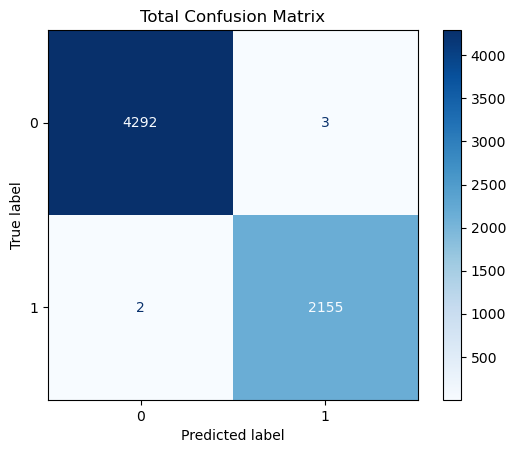

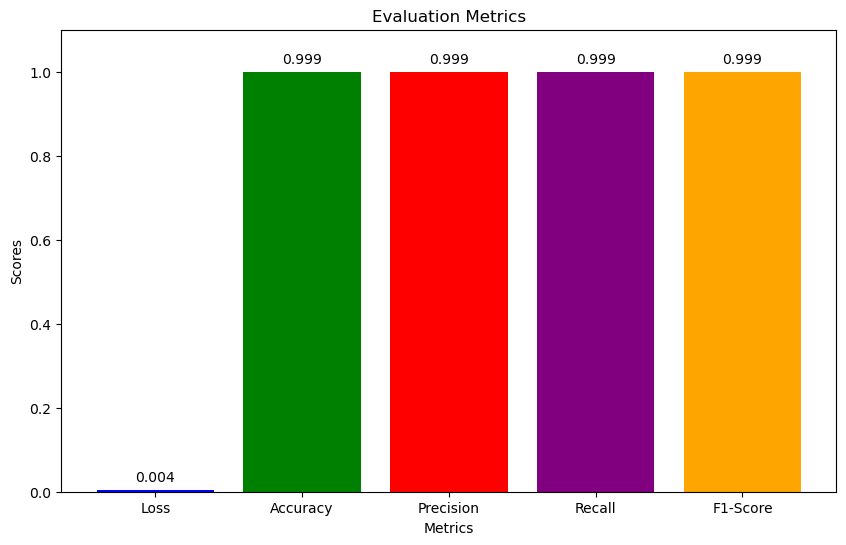

In [93]:
# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(5000, 128, input_length=max_length))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(3, activation='softmax')) #disini digunakan softmax karena label yang digunakan adalah 3 dan ini merupakan klasifikasi multi-kelas
# model_lstm.add(Dense(64, activation='relu'))
# model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM model
model_lstm.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate LSTM model
print("LSTM Model Evaluation:")
evaluate_model(model_lstm, X_test_padded, y_test)
evaluate_model_cv(model_lstm, X_test_padded, y_test)

Epoch 1/10
807/807 [==============================] - 111s 130ms/step - loss: 0.2200 - accuracy: 0.9097 - val_loss: 0.0923 - val_accuracy: 0.9715
Epoch 2/10
807/807 [==============================] - 98s 121ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0501 - val_accuracy: 0.9876
Epoch 3/10
807/807 [==============================] - 96s 119ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.0457 - val_accuracy: 0.9892
Epoch 4/10
807/807 [==============================] - 96s 119ms/step - loss: 0.0122 - accuracy: 0.9967 - val_loss: 0.0434 - val_accuracy: 0.9901
Epoch 5/10
807/807 [==============================] - 97s 120ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0368 - val_accuracy: 0.9904
Epoch 6/10
807/807 [==============================] - 97s 121ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0413 - val_accuracy: 0.9940
Epoch 7/10
807/807 [==============================] - 96s 119ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0480 - val_a

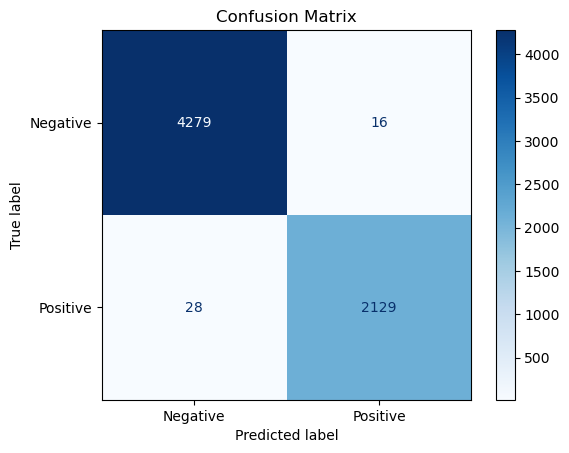

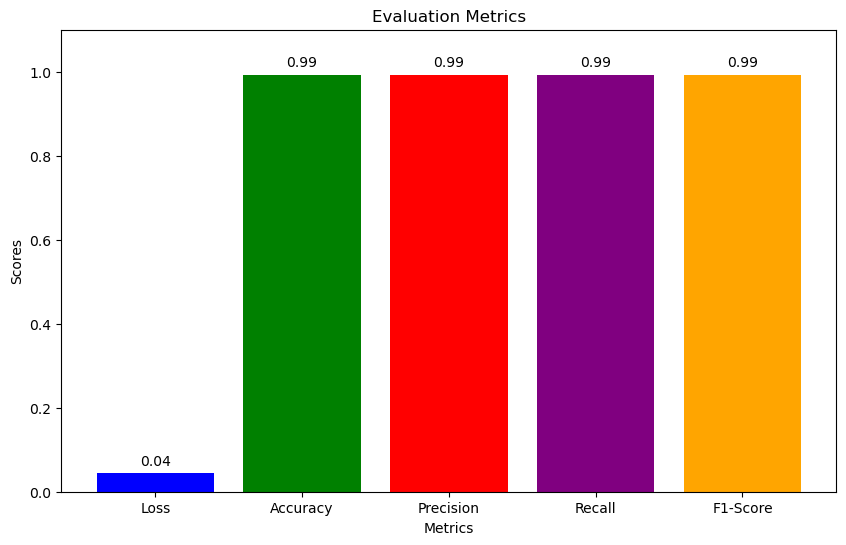

MODEL EVALUASI SETELAH CROSS VALIDATION
41/41 [==============================] - 1s 36ms/step
Average Loss: 0.007813426643497223
Average Accuracy: 0.9981409668922424
Average Precision: 0.9981451722163113
Average Recall: 0.9981409759876065
Average F1-Score: 0.9981417412755782
Confusion Matrices:


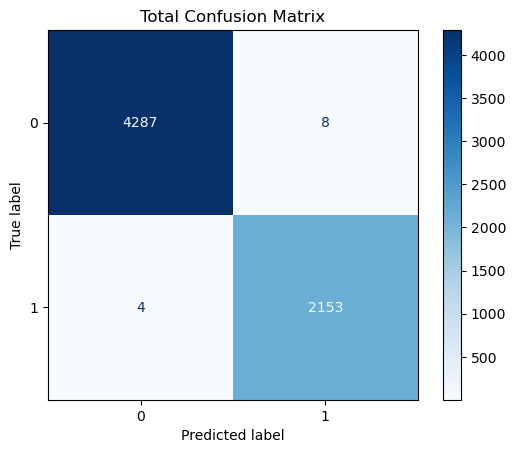

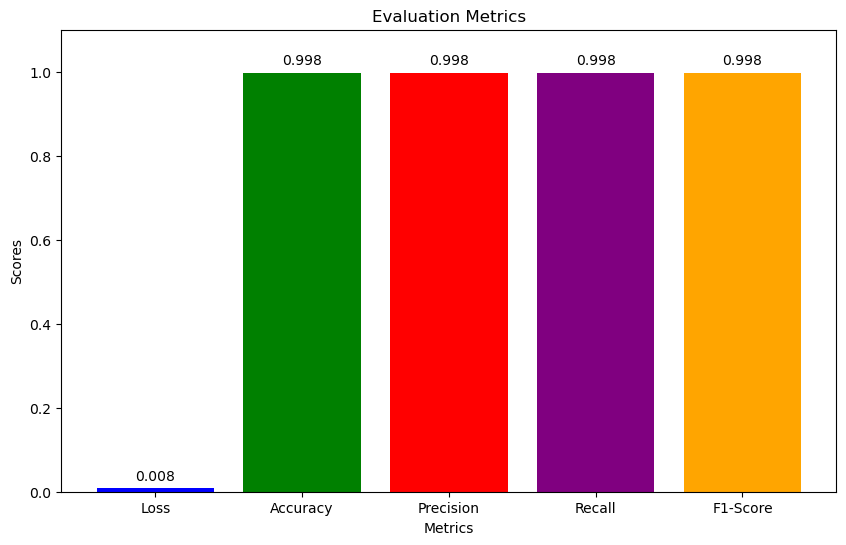

In [94]:
# Build Bidirectional LSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(5000, 128, input_length=max_length))
model_bilstm.add(Bidirectional(LSTM(128)))  # Add Bidirectional layer here
model_bilstm.add(Dense(3, activation='softmax'))
# model_bilstm.add(Dense(64, activation='relu'))
# model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Bidirectional LSTM model
model_bilstm.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate Bidirectional LSTM model
print("Bidirectional LSTM Model Evaluation:")
evaluate_model(model_bilstm, X_test_padded, y_test)
evaluate_model_cv(model_bilstm, X_test_padded, y_test)